# Tugas Besar Praktikum ML

dataset = `adult.csv` .

Dataset ini berasal dari sensus penduduk Amerika Serikat. Setiap baris mewakili seseorang dengan berbagai atribut seperti usia, tingkat pendidikan, pekerjaan, jam kerja, dan status pernikahan. Tujuannya adalah memprediksi apakah seseorang berpenghasilan lebih dari $50K per tahun atau tidak

Problem `Clasification`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## 1. Data Formatting

### - Importing Data

In [2]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### - Checking Column Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### -   Check Duplicates

In [4]:
df.duplicated().sum()

np.int64(24)

Ada 25 data duplikat yang harus di hapus

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Columnn `education` dan `education.num` memiliki nilai yang sama namun nilai dari `education.num` adalah numerik yang lebih mudah di olah sehingga column `education` bisa di hapus

In [7]:
df = df.drop('education', axis=1)

## 2. Missing Value

Nilai dari `workclass`, `occupation` dan `native.country` memiliki nilai ? yang merupakan ***missing value*** yang harus ditangani dengan mengubah nilainya dai '?' menjadi ***NaN***

In [8]:
df = df.replace('?', np.nan)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education.num   32537 non-null  int64 
 4   marital.status  32537 non-null  object
 5   occupation      30694 non-null  object
 6   relationship    32537 non-null  object
 7   race            32537 non-null  object
 8   sex             32537 non-null  object
 9   capital.gain    32537 non-null  int64 
 10  capital.loss    32537 non-null  int64 
 11  hours.per.week  32537 non-null  int64 
 12  native.country  31955 non-null  object
 13  income          32537 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.7+ MB


In [10]:
df

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [11]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\firman\AppData\Local\Temp\ipykernel_17388\344784494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


mengisi nilai **Missing Value** dengan nilai modus. Penggunaan **modus** untuk menangani *missing value* pada dataset ini adalah langkah paling rasional karena variabel yang terdampak (seperti `workclass` dan `native.country`) bertipe kategorikal, sehingga perhitungan matematis seperti rata-rata (*mean*) atau nilai tengah (*median*) mustahil dilakukan. Selain itu, mengingat distribusi data yang sangat timpang (*skewed*) di mana satu kategori mendominasi populasi (seperti mayoritas `United-States` atau sektor `Private`), mengisi data kosong dengan modus merupakan estimasi statistik yang paling aman dengan probabilitas kebenaran tertinggi. Pendekatan ini juga menjaga keutuhan volume data tanpa harus membuang informasi berharga pada kolom lain yang akan terjadi jika baris tersebut dihapus.

## 3. Data Binning

In [12]:
bins_age = [0, 25, 45, 65, 100]
labels_age = ['Young', 'Middle-Aged', 'Senior', 'Elderly']
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age)
def bin_hours(x):
    if x < 40: return 'Part-time'
    elif x == 40: return 'Full-time'
    else: return 'Over-time'
df['work_type'] = df['hours.per.week'].apply(bin_hours)
df['has_capital_gain'] = df['capital.gain'].apply(lambda x: 1 if x > 0 else 0)

df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_group,work_type,has_capital_gain
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,Elderly,Full-time,0
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,Elderly,Part-time,0
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K,Elderly,Full-time,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,Senior,Full-time,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,Middle-Aged,Full-time,0


Penerapan teknik **Binning** pada dataset ini dilakukan untuk alasan-alasan statistik berikut:

1.  **Menangkap Hubungan Non-Linear (`age`)**
    * **Masalah:** Hubungan antara *umur* dan *pendapatan* tidak bersifat linear (garis lurus). Pendapatan cenderung naik di usia produktif dan menurun saat pensiun.
    * **Solusi:** Mengelompokkan usia menjadi fase hidup (*Young, Adult, Senior*) membantu model memahami konteks sosial-ekonomi tanpa terjebak asumsi linearitas.

2.  **Mengatasi Dominasi Nilai Standar & Noise (`hours.per.week`)**
    * **Masalah:** Data sangat terkonsentrasi di angka **40 jam**. Variasi kecil (misal: 39 vs 40 jam) seringkali hanya *noise* dan tidak signifikan secara statistik.
    * **Solusi:** Kategorisasi menjadi logis (*Part-time, Full-time, Over-time*) memberikan sinyal yang lebih tegas ("Strong Signal") kepada model.

3.  **Menangani Sparse Data / Distribusi Timpang (`capital.gain` & `loss`)**
    * **Masalah:** Lebih dari **90% data bernilai 0**. Jika diperlakukan sebagai numerik kontinu, model akan bias ke arah nol dan gagal menangkap pengaruh kepemilikan aset.
    * **Solusi:** Konversi menjadi fitur biner (**0**: *No Asset*, **1**: *Has Asset*) atau kategori ordinal kasar jauh lebih stabil untuk model klasifikasi.

In [13]:
df = df.drop(columns=['native.country'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               32537 non-null  int64   
 1   workclass         32537 non-null  object  
 2   fnlwgt            32537 non-null  int64   
 3   education.num     32537 non-null  int64   
 4   marital.status    32537 non-null  object  
 5   occupation        32537 non-null  object  
 6   relationship      32537 non-null  object  
 7   race              32537 non-null  object  
 8   sex               32537 non-null  object  
 9   capital.gain      32537 non-null  int64   
 10  capital.loss      32537 non-null  int64   
 11  hours.per.week    32537 non-null  int64   
 12  income            32537 non-null  object  
 13  age_group         32537 non-null  category
 14  work_type         32537 non-null  object  
 15  has_capital_gain  32537 non-null  int64   
dtypes: category(1), int64(7), o

## Imbalance Problem

In [15]:
df['income'].value_counts()

income
<=50K    24698
>50K      7839
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='income'>

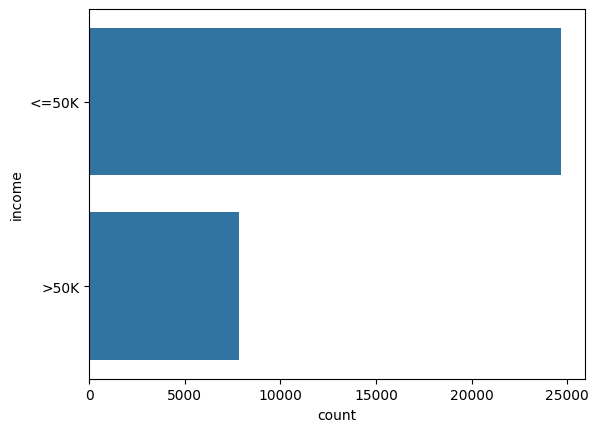

In [16]:
sns.countplot(df["income"])

In [17]:
# df_majority = df[(df['income']=="<=50K")] 
# df_minority = df[(df['income']==">50K")]
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,    
#                                  n_samples= 24698, 
#                                  random_state=42)  

# df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [18]:
# df_upsampled['income'].value_counts()
df_upsampled = df.copy()

In [19]:
df_upsampled['income'] = (df_upsampled['income'] == '>50K').astype(int)

## EDA

C:\Users\firman\AppData\Local\Temp\ipykernel_17388\4041718211.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='age_group', y='income', palette='viridis', ax=axes[0])
C:\Users\firman\AppData\Local\Temp\ipykernel_17388\4041718211.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='work_type', y='income', order=order_work, palette='coolwarm', ax=axes[1])
C:\Users\firman\AppData\Local\Temp\ipykernel_17388\4041718211.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='work_type', y='income', order=order_w

Text(0.5, 0, '')

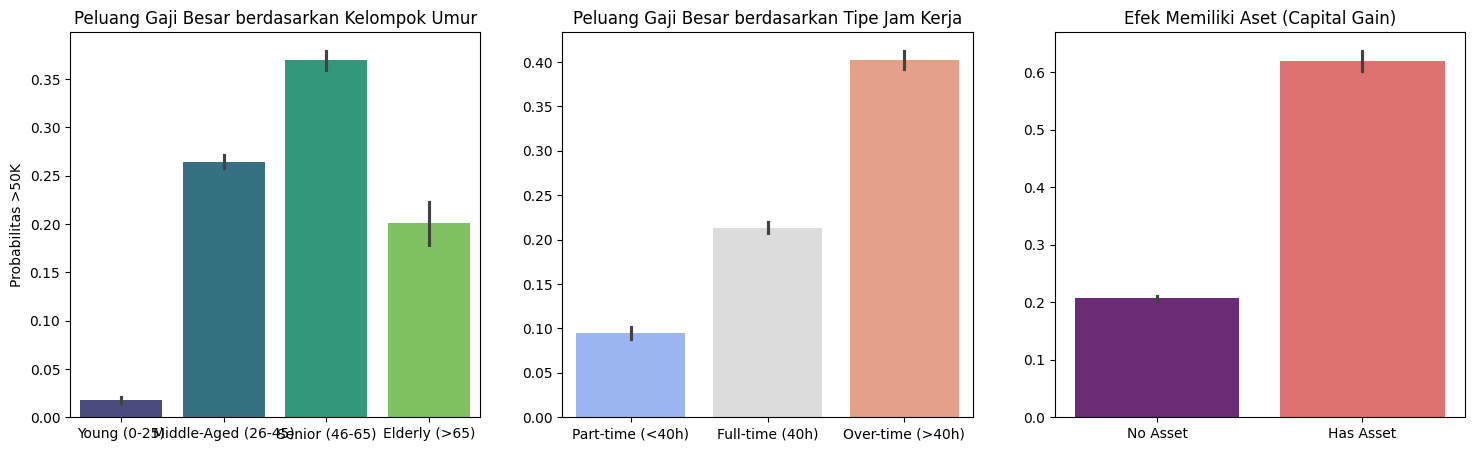

In [20]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# 1. Binning Age
bins_age = [0, 25, 45, 65, 100]
labels_age = ['Young (0-25)', 'Middle-Aged (26-45)', 'Senior (46-65)', 'Elderly (>65)']
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age)

# 2. Binning Hours per Week
def bin_hours(x):
    if x < 40: return 'Part-time (<40h)'
    elif x == 40: return 'Full-time (40h)'
    else: return 'Over-time (>40h)'
df['work_type'] = df['hours.per.week'].apply(bin_hours)

# 3. Binning Capital Gain
df['has_capital_gain'] = df['capital.gain'].apply(lambda x: 'Has Asset' if x > 0 else 'No Asset')

# EDA Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1: Age Group
sns.barplot(data=df, x='age_group', y='income', palette='viridis', ax=axes[0])
axes[0].set_title('Peluang Gaji Besar berdasarkan Kelompok Umur')
axes[0].set_ylabel('Probabilitas >50K')
axes[0].set_xlabel('')

# 2: Work Type
# Order: Part-time, Full-time, Over-time
order_work = ['Part-time (<40h)', 'Full-time (40h)', 'Over-time (>40h)']
sns.barplot(data=df, x='work_type', y='income', order=order_work, palette='coolwarm', ax=axes[1])
axes[1].set_title('Peluang Gaji Besar berdasarkan Tipe Jam Kerja')
axes[1].set_ylabel('')
axes[1].set_xlabel('')

# 3: Capital Gain Flag
sns.barplot(data=df, x='has_capital_gain', y='income', palette='magma', ax=axes[2])
axes[2].set_title('Efek Memiliki Aset (Capital Gain)')
axes[2].set_ylabel('')
axes[2].set_xlabel('')

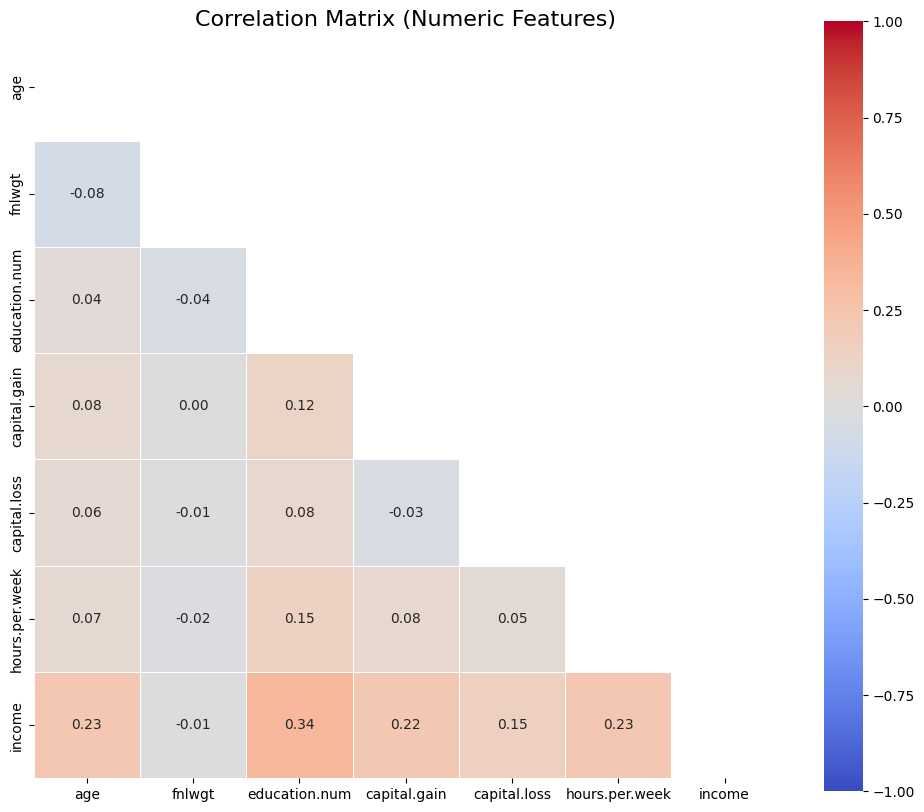

In [21]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_cols]

# 2. Hitung matriks korelasi
corr_matrix = numeric_df.corr()

# 3. Setup ukuran plot
plt.figure(figsize=(12, 10))

# 4. Buat mask untuk menutupi bagian atas segitiga (agar tidak menampilkan informasi berulang)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 5. Plot Heatmap
sns.heatmap(corr_matrix, 
            mask=mask,          # Gunakan mask segitiga atas
            annot=True,         # Tampilkan angka korelasi
            fmt=".2f",          # Format angka 2 desimal
            cmap='coolwarm',    # Skala warna merah-biru
            linewidths=.5,      # Garis pemisah antar kotak
            vmin=-1, vmax=1,    # Batas skala warna dari -1 hingga 1
            square=True)        # Kotak berbentuk persegi

plt.title('Correlation Matrix (Numeric Features)', fontsize=16)
plt.show()

In [22]:
# df_upsampled = df_upsampled.drop('fnlwgt', axis=1)


C:\Users\firman\AppData\Local\Temp\ipykernel_17388\3724579882.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


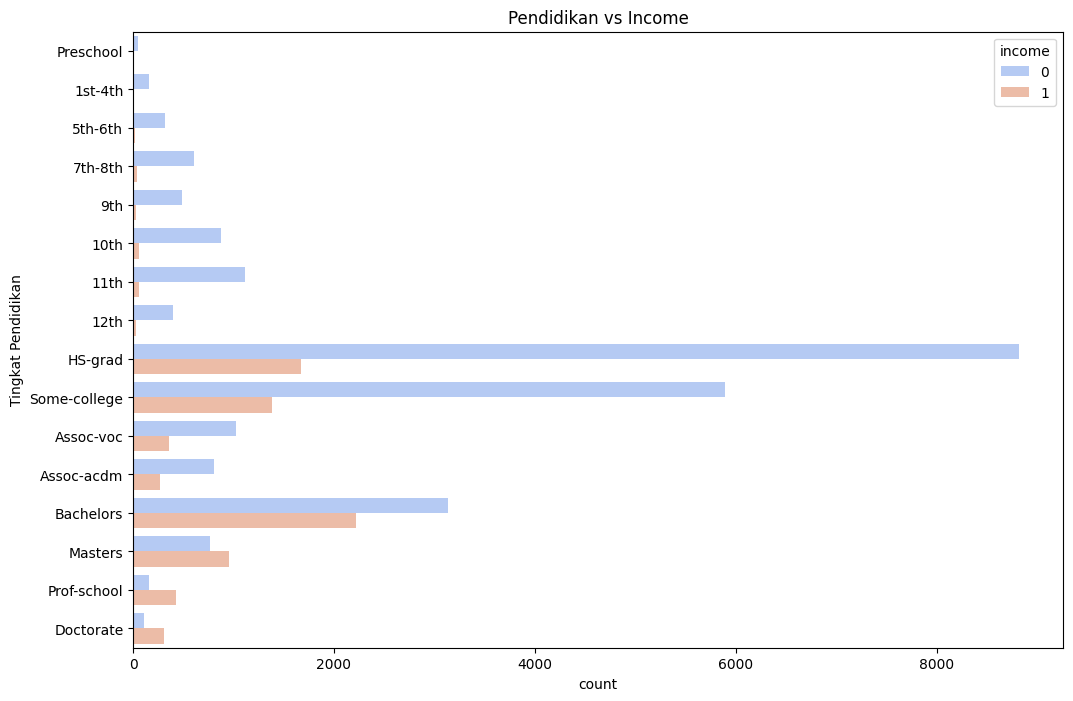

In [23]:
edu_map = {
    1: 'Preschool', 2: '1st-4th', 3: '5th-6th', 4: '7th-8th', 
    5: '9th', 6: '10th', 7: '11th', 8: '12th', 
    9: 'HS-grad', 10: 'Some-college', 11: 'Assoc-voc', 12: 'Assoc-acdm', 
    13: 'Bachelors', 14: 'Masters', 15: 'Prof-school', 16: 'Doctorate'
}

# 3. Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

# Urutkan berdasarkan angka (1 sampai 16)
sorted_nums = sorted(edu_map.keys()) # [1, 2, ..., 16]

# Plot menggunakan education.num
sns.countplot(data=df, y='education.num', hue='income', order=sorted_nums, palette='coolwarm', ax=ax)

# TRICK KUNCI: Ganti label angka menjadi teks kembali
# Kita ambil label teks dari kamus edu_map sesuai urutan sorted_nums
labels = [edu_map[x] for x in sorted_nums]
ax.set_yticklabels(labels)

ax.set_title('Pendidikan vs Income')
ax.set_ylabel('Tingkat Pendidikan')
plt.show()

# Model

In [24]:
df_upsampled

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,age_group,work_type,has_capital_gain
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,0,Elderly,Full-time,0
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,0,Elderly,Part-time,0
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,0,Elderly,Full-time,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,0,Senior,Full-time,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,0,Middle-Aged,Full-time,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,0,Young,Full-time,0
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,Middle-Aged,Part-time,0
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1,Middle-Aged,Full-time,0
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,Senior,Full-time,0


In [25]:
df_reg = df_upsampled.copy()
df_tree = df_upsampled.copy()

In [26]:
cols_drop_reg = ['age', 'hours.per.week', 'capital.gain', 'capital.loss']
df_reg = df_reg.drop(cols_drop_reg, axis=1)

In [27]:
# scaler = StandardScaler()
# # Scaling hanya kolom numerik tersisa (misal: fnlwgt, education.num)
# num_cols = df_reg.select_dtypes(include=['int64', 'float64']).columns.drop('income')
# df_reg[num_cols] = scaler.fit_transform(df_reg[num_cols])

In [28]:
df_reg = pd.get_dummies(df_reg, drop_first=True)

In [29]:
cols_drop_tree = ['age_group', 'work_type', 'has_capital_gain', 'education'] 
df_tree = df_tree.drop(cols_drop_tree, axis=1, errors='ignore')

df_tree = pd.get_dummies(df_tree, drop_first=True)

In [30]:
df_reg

,fnlwgt,education.num,income,has_capital_gain,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,age_group_Middle-Aged,age_group_Senior,age_group_Elderly,work_type_Over-time,work_type_Part-time
0,77053,9,0,0,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,132870,9,0,0,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,True
2,186061,10,0,0,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,140359,4,0,0,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,264663,10,0,0,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,310152,10,0,0,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
32557,257302,12,0,0,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
32558,154374,9,1,0,False,False,True,False,False,False,...,False,False,False,True,True,True,False,False,False,False
32559,151910,9,0,0,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False


In [31]:
X_reg = df_reg.drop(['income'], axis=1, errors='ignore')
y_reg = df_reg['income']

# Split data menjadi training dan testing (80% train, 20% test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# --- Modeling ---
logmodel = LogisticRegression()
logmodel.fit(X_train_reg, y_train_reg)

# --- Prediksi dan Evaluasi ---
predictions_reg = logmodel.predict(X_test_reg)

print("=== Logistic Regression Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test_reg, predictions_reg):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_reg, predictions_reg))   
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_reg, predictions_reg))

=== Logistic Regression Evaluation ===
Accuracy: 0.7975

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4988
           1       0.57      0.54      0.56      1520

    accuracy                           0.80      6508
   macro avg       0.72      0.71      0.71      6508
weighted avg       0.79      0.80      0.80      6508


Confusion Matrix:
[[4364  624]
 [ 694  826]]


c:\Users\firman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
X_tree_data = df_tree.drop(['income'], axis=1, errors='ignore')
y_tree_data = df_tree['income']

# Split data
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree_data, y_tree_data, test_size=0.2, random_state=42)

# --- Modeling ---
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_tree, y_train_tree)

predictions_tree = dtree.predict(X_test_tree)

print("\n=== Decision Tree Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test_tree, predictions_tree):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_tree, predictions_tree))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_tree, predictions_tree))


=== Decision Tree Evaluation ===
Accuracy: 0.8148

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4988
           1       0.60      0.64      0.62      1520

    accuracy                           0.81      6508
   macro avg       0.74      0.75      0.75      6508
weighted avg       0.82      0.81      0.82      6508


Confusion Matrix:
[[4328  660]
 [ 545  975]]


In [33]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=None,
                                       n_estimators=100, oob_score=True)

rf.fit(X_train_tree, y_train_tree)
predictions_tree = rf.predict(X_test_tree)
print("\n=== Random Forest Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test_tree, predictions_tree):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_tree, predictions_tree))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_tree, predictions_tree))


=== Random Forest Evaluation ===
Accuracy: 0.8543

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4988
           1       0.71      0.63      0.67      1520

    accuracy                           0.85      6508
   macro avg       0.80      0.78      0.79      6508
weighted avg       0.85      0.85      0.85      6508


Confusion Matrix:
[[4600  388]
 [ 560  960]]


In [34]:
from sklearn.svm import SVC

# 1. Inisialisasi Model
# kernel='rbf' bagus untuk data yang tidak terpisah secara linear
svm = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42)

# 2. Training (Ini mungkin agak lama karena data 32k baris)
svm.fit(X_train_reg, y_train_reg)

# 3. Evaluasi
pred_svm = svm.predict(X_test_reg)
print("=== SVM Accuracy ===")
print(accuracy_score(y_test_reg, pred_svm))
print(classification_report(y_test_reg, pred_svm))

=== SVM Accuracy ===
0.4623540258143823
              precision    recall  f1-score   support

           0       0.78      0.41      0.54      4988
           1       0.24      0.62      0.35      1520

    accuracy                           0.46      6508
   macro avg       0.51      0.52      0.45      6508
weighted avg       0.66      0.46      0.50      6508

